
[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Sample Dataset:
                                    review sentiment
0      This product is amazing! I love it.  positive
1         Worst purchase ever. Do not buy.  negative
2              Good quality for the price.  positive
3  Not what I expected. Very disappointed.  negative
4      Excellent product, works perfectly.  positive

After Preprocessing:
                                    review sentiment  \
0      This product is amazing! I love it.  positive   
1         Worst purchase ever. Do not buy.  negative   
2              Good quality for the price.  positive   
3  Not what I expected. Very disappointed.  negative   
4      Excellent product, works perfectly.  positive   

                     cleaned_review  
0              product amazing love  
1           worst purchase ever buy  
2                good quality price  
3             expected disappointed  
4  excellent product work perfectly  



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Abhinay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


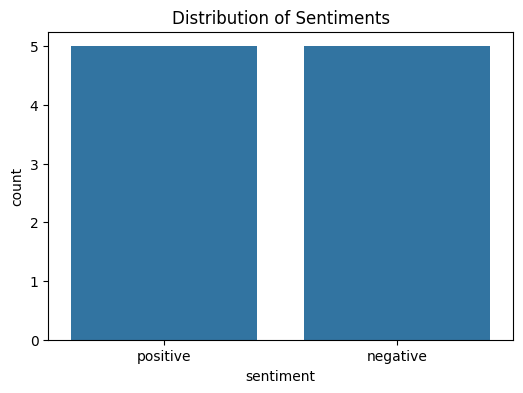

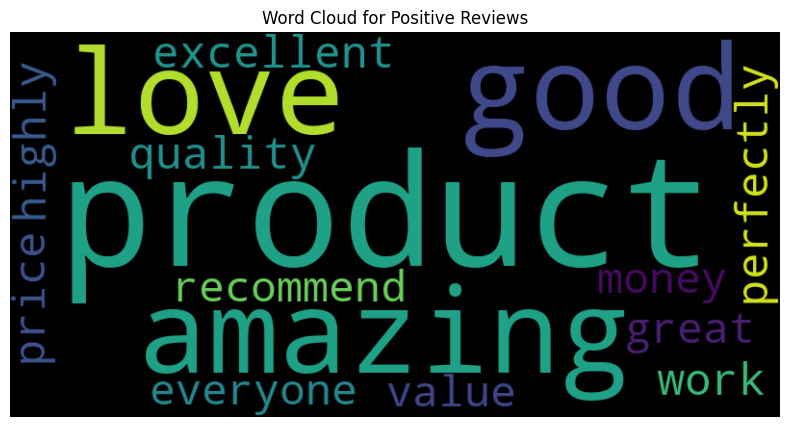

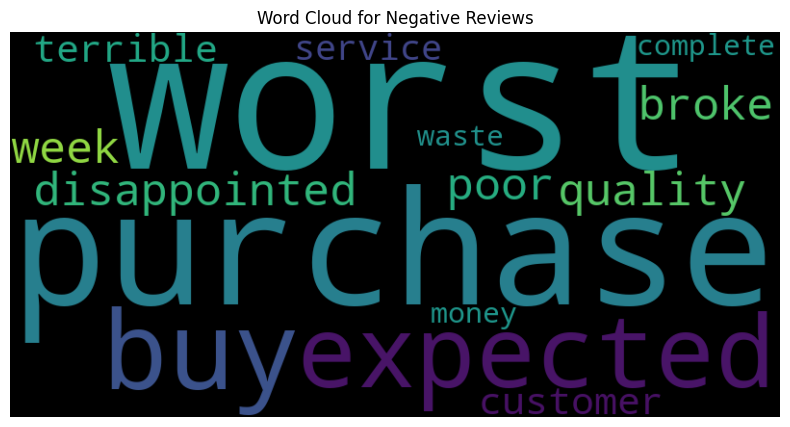


Training samples: 8
Testing samples: 2

Accuracy: 0.50


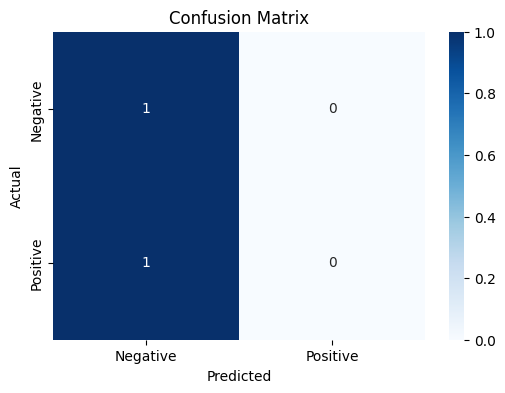


Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Predictions for New Reviews:
Review: I really like this product. It's fantastic!
Predicted Sentiment: positive

Review: This is not good at all. Very poor quality.
Predicted Sentiment: negative

Review: It's okay, but could be better.
Predicted Sentiment: negative

Review: Absolutely wonderful! Exceeded my expectations.
Predicted Sentiment: negative



c:\Users\Abhinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Abhinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Abhinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [2]:
!pip install seaborn
!pip install matplotlib

"""
# Sentiment Analysis of Product Reviews using Naive Bayes

This project performs sentiment analysis on product reviews using the Naive Bayes algorithm. 
We'll classify reviews as positive or negative based on their text content.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


data = {
    'review': [
        'This product is amazing! I love it.',
        'Worst purchase ever. Do not buy.',
        'Good quality for the price.',
        'Not what I expected. Very disappointed.',
        'Excellent product, works perfectly.',
        'Poor quality, broke after a week.',
        'Highly recommend this to everyone!',
        'Terrible customer service.',
        'Great value for money.',
        'Complete waste of money.'
    ],
    'sentiment': [
        'positive', 'negative', 'positive', 'negative', 
        'positive', 'negative', 'positive', 'negative',
        'positive', 'negative'
    ]
}

df = pd.DataFrame(data)
print("Sample Dataset:")
print(df.head())


def preprocess_text(text):
    
    text = text.lower()
    
    text = ''.join([char for char in text if char not in string.punctuation])
    
    words = text.split()
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)
print("\nAfter Preprocessing:")
print(df.head())


plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400).generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()


negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400).generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


y_pred = nb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


def predict_sentiment(review):
    
    cleaned_review = preprocess_text(review)
    
    
    review_vector = vectorizer.transform([cleaned_review])
    
  
    prediction = nb_classifier.predict(review_vector)
    
    return prediction[0]


new_reviews = [
    "I really like this product. It's fantastic!",
    "This is not good at all. Very poor quality.",
    "It's okay, but could be better.",
    "Absolutely wonderful! Exceeded my expectations."
]

print("\nPredictions for New Reviews:")
for review in new_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")